# Day 1 - Housing Price (Linear Regression) 

In [1]:
import warnings 
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
data = pd.read_csv("C:/Users/pater/OneDrive/Documents/Code Practice/Machine Learning with python/data\Housing_price.csv")
data

,number of bedrooms,living area,lot area,Area of the house(excluding basement),lot_area_renov,Price
0,5,3650,9050,3370,5400,2380000
1,4,2920,4000,1910,4000,1400000
2,5,2910,9480,2910,6600,1200000
3,4,3310,42998,3310,42847,838000
4,3,2710,4500,1880,4500,805000
...,...,...,...,...,...,...
14615,2,1556,20000,1556,17286,221700
14616,3,1680,7000,1680,7480,219200
14617,2,1070,6120,1070,6120,209000
14618,4,1030,6621,1030,6631,205000


In [3]:
data.head()

,number of bedrooms,living area,lot area,Area of the house(excluding basement),lot_area_renov,Price
0,5,3650,9050,3370,5400,2380000
1,4,2920,4000,1910,4000,1400000
2,5,2910,9480,2910,6600,1200000
3,4,3310,42998,3310,42847,838000
4,3,2710,4500,1880,4500,805000


In [4]:
data.isna().sum()

number of bedrooms                       0
living area                              0
lot area                                 0
Area of the house(excluding basement)    0
lot_area_renov                           0
Price                                    0
dtype: int64

array([[<Axes: title={'center': 'number of bedrooms'}>,
        <Axes: title={'center': 'living area'}>],
       [<Axes: title={'center': 'lot area'}>,
        <Axes: title={'center': 'Area of the house(excluding basement)'}>],
       [<Axes: title={'center': 'lot_area_renov'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

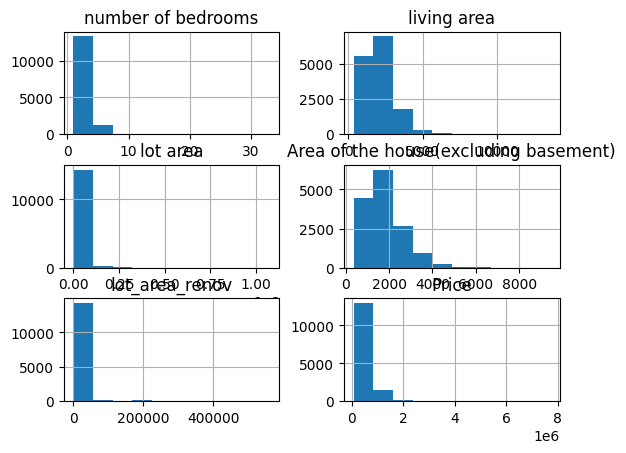

In [5]:
data.hist()

In [6]:
data.describe()

,number of bedrooms,living area,lot area,Area of the house(excluding basement),lot_area_renov,Price
count,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,1.462000e+04
mean,3.379343,2098.262996,1.509328e+04,1801.783926,12753.500068,5.389322e+05
std,0.938719,928.275721,3.791962e+04,833.809963,26058.414467,3.675324e+05
min,1.000000,370.000000,5.200000e+02,370.000000,651.000000,7.800000e+04
25%,3.000000,1440.000000,5.010750e+03,1200.000000,5097.750000,3.200000e+05
50%,3.000000,1930.000000,7.620000e+03,1580.000000,7620.000000,4.500000e+05
75%,4.000000,2570.000000,1.080000e+04,2240.000000,10125.000000,6.450000e+05
max,33.000000,13540.000000,1.074218e+06,9410.000000,560617.000000,7.700000e+06


# Assign x and y 

In [7]:
x = data.iloc[:, 1:2]
x.head(2)

,living area
0,3650
1,2920


In [8]:
y = data.iloc[:,-1:]
y.head(2)

,Price
0,2380000
1,1400000


In [9]:
type(x)

pandas.core.frame.DataFrame

In [10]:
type(y)

pandas.core.frame.DataFrame

In [11]:
a = data.iloc[:,1:2].values
b = data.iloc[:,-1].values
print(type(a),type(b))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [12]:
b

array([2380000, 1400000, 1200000, ...,  209000,  205000,  146000],
      dtype=int64)

In [13]:
data.corr()

,number of bedrooms,living area,lot area,Area of the house(excluding basement),lot_area_renov,Price
number of bedrooms,1.000000,0.570526,0.034416,0.473599,0.029400,0.308460
living area,0.570526,1.000000,0.174420,0.875793,0.180312,0.712169
lot area,0.034416,0.174420,1.000000,0.183553,0.706812,0.081992
Area of the house(excluding basement),0.473599,0.875793,0.183553,1.000000,0.194670,0.615220
lot_area_renov,0.029400,0.180312,0.706812,0.194670,1.000000,0.075535
Price,0.308460,0.712169,0.081992,0.615220,0.075535,1.000000


# Visualize the dataset

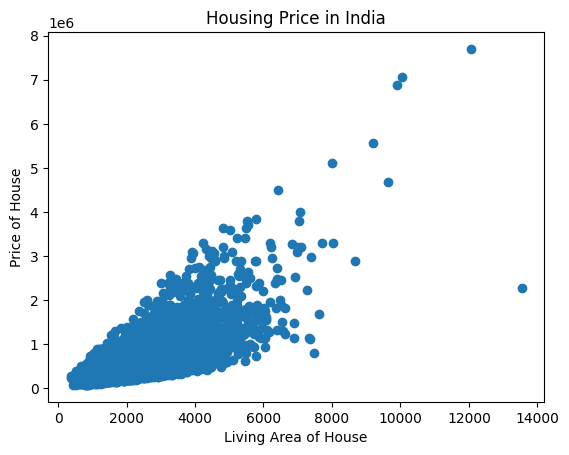

In [14]:
plt.scatter(x,y)
plt.title('Housing Price in India')
plt.xlabel('Living Area of House')
plt.ylabel('Price of House')
plt.show()

# Split data to test and train

In [15]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [16]:
data.shape

(14620, 6)

In [17]:
xtrain.shape

(11696, 1)

In [18]:
xtest.head()

,living area
1339,1620
6232,1370
1104,1960
2669,1840
8467,2430


# Model building using Linear Regression Algorithm

In [19]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
#train the data
lin_reg.fit(xtrain, ytrain)
print("training completed")
#test the data
ypred = lin_reg.predict(xtest)
print("predicted total house price", ypred)
print("testing is done")

training completed
predicted total house price [[402490.34461662]
 [330862.97772536]
 [499903.56358872]
 ...
 [717650.75893814]
 [683269.62283033]
 [242045.04278021]]
testing is done


In [20]:
ytest

,Price
1339,467100
6232,245000
1104,250000
2669,285000
8467,485000
...,...
4713,339000
480,280000
12071,599950
11267,509000


In [21]:
diff = ytest-ypred
diff

,Price
1339,64609.655383
6232,-85862.977725
1104,-249903.563589
2669,-180522.427481
8467,-149563.013344
...,...
4713,-198149.794372
480,-285800.741129
12071,-117700.758938
11267,-174269.622830


# Visualize the training dataset

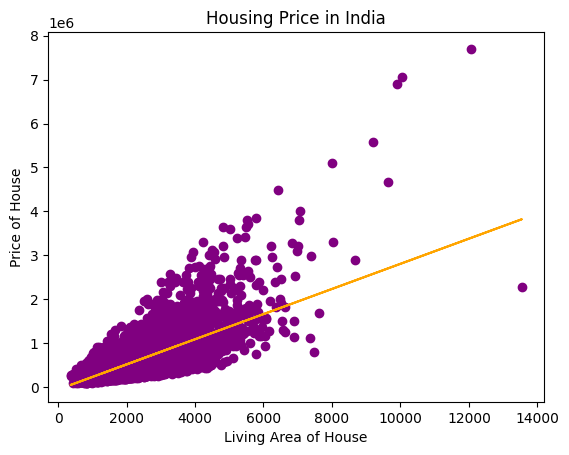

In [22]:
plt.scatter(xtrain, ytrain, color = 'purple')
plt.plot(xtrain,lin_reg.predict(xtrain), color = 'orange')
plt.title('Housing Price in India')
plt.xlabel('Living Area of House')
plt.ylabel('Price of House')
plt.show()

# Visualize the test dataset

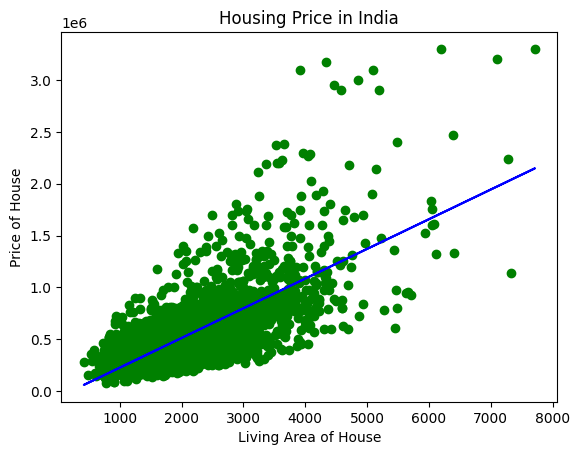

In [23]:
plt.scatter(xtest, ytest, color = 'green')
plt.plot(xtest,lin_reg.predict(xtest), color = 'blue')
plt.title('Housing Price in India')
plt.xlabel('Living Area of House')
plt.ylabel('Price of House')
plt.show()

# Model performance via Metrics

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

print('Mean Squared Error: \t', mean_squared_error(ytest,ypred))
print()

print('RMSE: \t', np.sqrt(mean_squared_error(ytest, ypred)))
print()

print('Variance Score:\t', explained_variance_score(ytest, ypred))

# Coeficient of determination R square
print()
print('R-Square:\t',r2_score(ytest, ypred))

Mean Squared Error: 	 62097240775.26183

RMSE: 	 249193.17963231224

Variance Score:	 0.4807077785289061

R-Square:	 0.4806362210633991


# Implement Multiple Linear regression

In [25]:
x = data.iloc[:,:-1]
x.head(2)

,number of bedrooms,living area,lot area,Area of the house(excluding basement),lot_area_renov
0,5,3650,9050,3370,5400
1,4,2920,4000,1910,4000


In [26]:
y = data.iloc[:,-1:]
y.head(2)

,Price
0,2380000
1,1400000


In [27]:
type(y)

pandas.core.frame.DataFrame

In [28]:
a = data.iloc[:,:-1].values
b = data.iloc[:,-1:].values
print(type(a),type(b))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [29]:
b

array([[2380000],
       [1400000],
       [1200000],
       ...,
       [ 209000],
       [ 205000],
       [ 146000]], dtype=int64)

<Axes: xlabel='living area', ylabel='Price'>

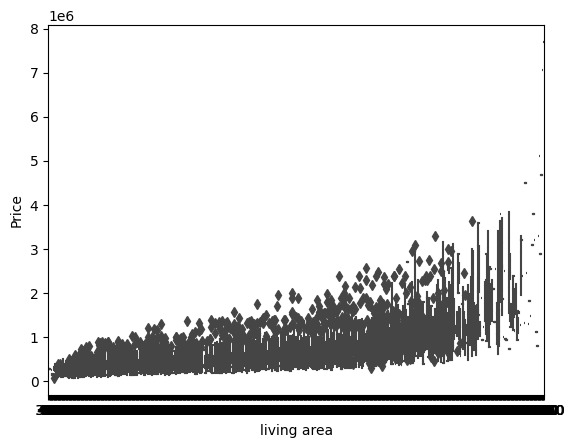

In [39]:
sns.boxplot(x='living area', y='Price', data=data)

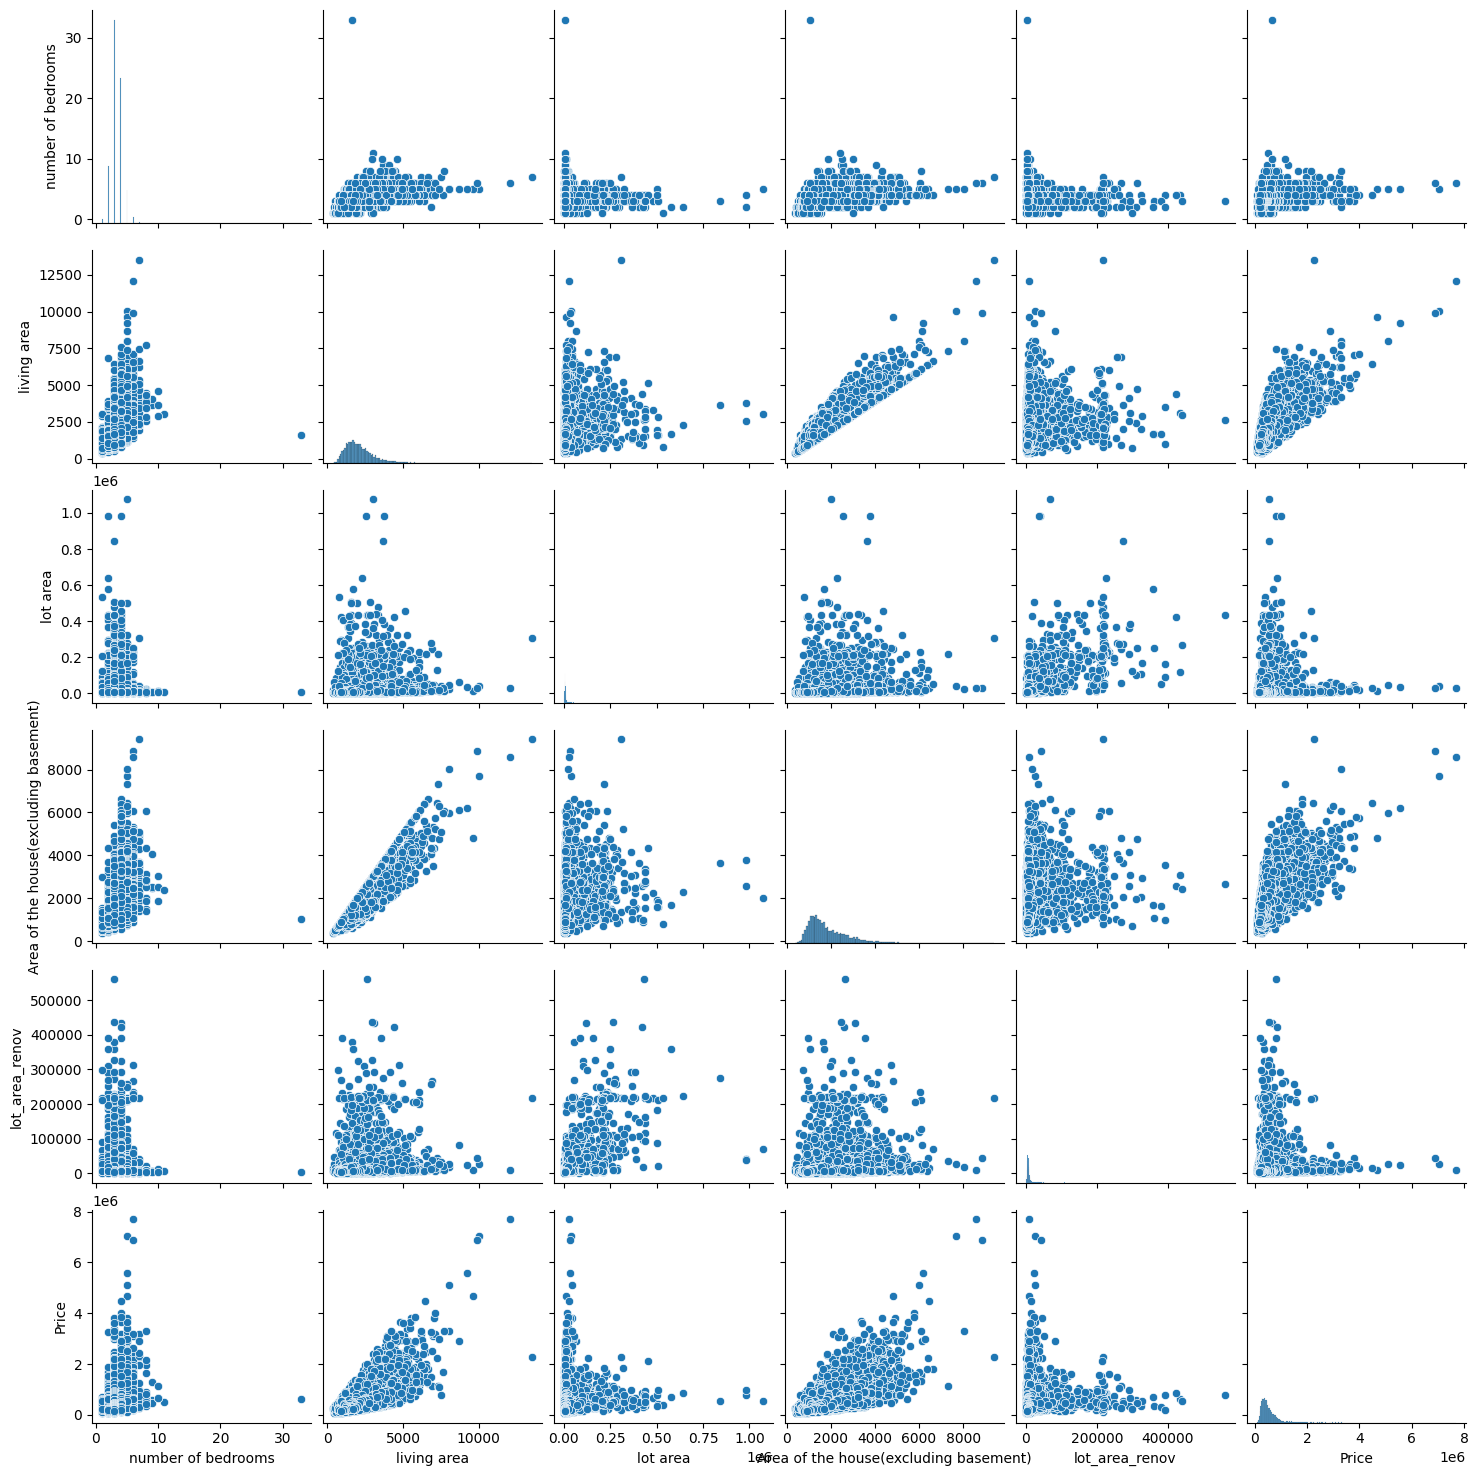

In [76]:
sns.pairplot(data)

In [30]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [31]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
#train the data
lin_reg.fit(xtrain, ytrain)
print("training completed")
#test the data
ypred = lin_reg.predict(xtest)
print("predicted total house price", ypred)
print("testing is done")

training completed
predicted total house price [[414464.89233227]
 [325612.18879404]
 [469927.11986973]
 ...
 [723420.02383412]
 [676258.0282148 ]
 [226378.52793073]]
testing is done


In [32]:
diff = ytest-ypred
diff

,Price
1339,52635.107668
6232,-80612.188794
1104,-219927.119870
2669,-210236.066826
8467,-187201.056089
...,...
4713,-234518.979099
480,-261313.644090
12071,-123470.023834
11267,-167258.028215


In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

print('Mean Squared Error: \t', mean_squared_error(ytest,ypred))
print()

print('RMSE: \t', np.sqrt(mean_squared_error(ytest, ypred)))
print()

print('Variance Score:\t', explained_variance_score(ytest, ypred))

# Coeficient of determination R square
print()
print('R-Square:\t',r2_score(ytest, ypred))

Mean Squared Error: 	 60574159180.85516

RMSE: 	 246118.18132932635

Variance Score:	 0.49339140307712037

R-Square:	 0.49337484523774344


In [34]:
data.corr()

,number of bedrooms,living area,lot area,Area of the house(excluding basement),lot_area_renov,Price
number of bedrooms,1.000000,0.570526,0.034416,0.473599,0.029400,0.308460
living area,0.570526,1.000000,0.174420,0.875793,0.180312,0.712169
lot area,0.034416,0.174420,1.000000,0.183553,0.706812,0.081992
Area of the house(excluding basement),0.473599,0.875793,0.183553,1.000000,0.194670,0.615220
lot_area_renov,0.029400,0.180312,0.706812,0.194670,1.000000,0.075535
Price,0.308460,0.712169,0.081992,0.615220,0.075535,1.000000


<Axes: >

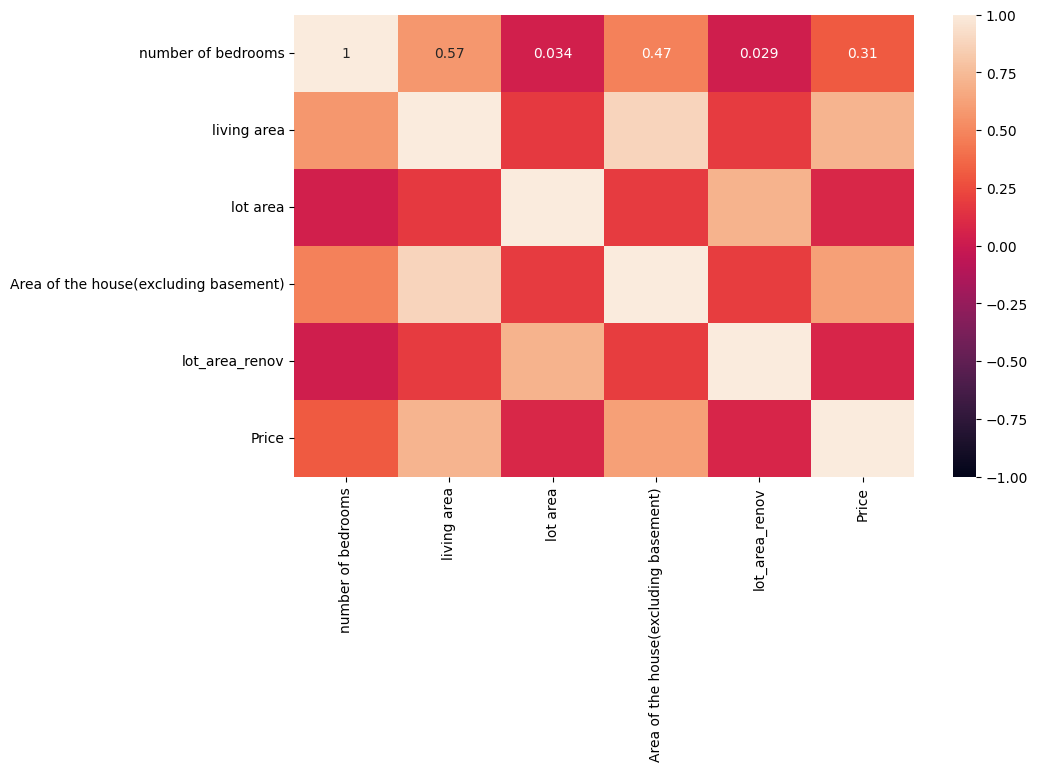

In [40]:
plt.figure(figsize = (10,6))
sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1)

# Summary of the comparison:

Multiple Linear Regression:

Mean Squared Error: 60,574,159,180.86
Root Mean Squared Error (RMSE): 246,118.18
Variance Score: 0.4934
R-squared (R²): 0.4934
Simple Linear Regression:

Mean Squared Error: 62,097,240,775.26
Root Mean Squared Error (RMSE): 249,193.18
Variance Score: 0.4807
R-squared (R²): 0.4806


Multiple linear regression model outperforms the simple linear regression model in terms of various performance metrics. It provides a better fit to the data and explains more of the variance in the housing prices. However, it's important to consider other factors such as the complexity of the model and the number of features when choosing between simple and multiple linear regression.

Model improvement - Enhance the performance and generalization of model, making it more accurate and robust for predicting housing prices or any other regression task.